## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9589765	total: 70.2ms	remaining: 1m 10s
1:	learn: 0.9403369	total: 71.4ms	remaining: 35.6s
2:	learn: 0.9205208	total: 72.5ms	remaining: 24.1s
3:	learn: 0.9046535	total: 73.6ms	remaining: 18.3s
4:	learn: 0.8873150	total: 74.7ms	remaining: 14.9s
5:	learn: 0.8706391	total: 75.8ms	remaining: 12.6s
6:	learn: 0.8548607	total: 76.8ms	remaining: 10.9s
7:	learn: 0.8379575	total: 77.8ms	remaining: 9.64s
8:	learn: 0.8226380	total: 78.8ms	remaining: 8.68s
9:	learn: 0.8058438	total: 79.8ms	remaining: 7.9s
10:	learn: 0.7901061	total: 80.8ms	remaining: 7.26s
11:	learn: 0.7748707	total: 81.8ms	remaining: 6.74s
12:	learn: 0.7596402	total: 82.7ms	remaining: 6.28s
13:	learn: 0.7446502	total: 83.6ms	remaining: 5.89s
14:	learn: 0.7303546	total: 84.5ms	remaining: 5.55s
15:	learn: 0.7163294	total: 85.4ms	remaining: 5.25s
16:	learn: 0.7039438	total: 86.4ms	remaining: 5s
17:	learn: 0.6910926	total: 87.3ms	remaining: 4.76s
18:	learn: 0.6790864	total: 88.2ms	remaining: 4

44:	learn: 0.4692268	total: 109ms	remaining: 2.31s
45:	learn: 0.4637634	total: 110ms	remaining: 2.28s
46:	learn: 0.4593033	total: 111ms	remaining: 2.25s
47:	learn: 0.4535691	total: 111ms	remaining: 2.21s
48:	learn: 0.4492552	total: 112ms	remaining: 2.18s
49:	learn: 0.4443767	total: 113ms	remaining: 2.15s
50:	learn: 0.4395486	total: 114ms	remaining: 2.12s
51:	learn: 0.4349793	total: 114ms	remaining: 2.09s
52:	learn: 0.4305922	total: 115ms	remaining: 2.06s
53:	learn: 0.4274215	total: 116ms	remaining: 2.03s
54:	learn: 0.4231024	total: 117ms	remaining: 2s
55:	learn: 0.4194115	total: 117ms	remaining: 1.98s
56:	learn: 0.4152439	total: 118ms	remaining: 1.95s
57:	learn: 0.4111680	total: 119ms	remaining: 1.93s
58:	learn: 0.4074321	total: 119ms	remaining: 1.91s
59:	learn: 0.4036412	total: 120ms	remaining: 1.88s
60:	learn: 0.3995203	total: 121ms	remaining: 1.86s
61:	learn: 0.3964661	total: 122ms	remaining: 1.84s
62:	learn: 0.3933079	total: 122ms	remaining: 1.82s
63:	learn: 0.3897305	total: 123ms	

145:	learn: 0.2589232	total: 192ms	remaining: 1.12s
146:	learn: 0.2580584	total: 193ms	remaining: 1.12s
147:	learn: 0.2575338	total: 195ms	remaining: 1.12s
148:	learn: 0.2565092	total: 195ms	remaining: 1.12s
149:	learn: 0.2558862	total: 196ms	remaining: 1.11s
150:	learn: 0.2551341	total: 197ms	remaining: 1.11s
151:	learn: 0.2543579	total: 198ms	remaining: 1.1s
152:	learn: 0.2536742	total: 199ms	remaining: 1.1s
153:	learn: 0.2532377	total: 199ms	remaining: 1.09s
154:	learn: 0.2526112	total: 200ms	remaining: 1.09s
155:	learn: 0.2515814	total: 201ms	remaining: 1.09s
156:	learn: 0.2503980	total: 202ms	remaining: 1.08s
157:	learn: 0.2501227	total: 203ms	remaining: 1.08s
158:	learn: 0.2493163	total: 204ms	remaining: 1.08s
159:	learn: 0.2485562	total: 205ms	remaining: 1.08s
160:	learn: 0.2478166	total: 206ms	remaining: 1.07s
161:	learn: 0.2471876	total: 207ms	remaining: 1.07s
162:	learn: 0.2468533	total: 208ms	remaining: 1.07s
163:	learn: 0.2465550	total: 208ms	remaining: 1.06s
164:	learn: 0.

271:	learn: 0.1945832	total: 299ms	remaining: 800ms
272:	learn: 0.1945114	total: 300ms	remaining: 799ms
273:	learn: 0.1942150	total: 301ms	remaining: 797ms
274:	learn: 0.1938616	total: 301ms	remaining: 795ms
275:	learn: 0.1936784	total: 302ms	remaining: 793ms
276:	learn: 0.1932299	total: 303ms	remaining: 791ms
277:	learn: 0.1928875	total: 304ms	remaining: 789ms
278:	learn: 0.1926561	total: 305ms	remaining: 787ms
279:	learn: 0.1925083	total: 305ms	remaining: 785ms
280:	learn: 0.1919186	total: 306ms	remaining: 783ms
281:	learn: 0.1912086	total: 307ms	remaining: 781ms
282:	learn: 0.1909372	total: 308ms	remaining: 780ms
283:	learn: 0.1907332	total: 309ms	remaining: 778ms
284:	learn: 0.1902318	total: 309ms	remaining: 776ms
285:	learn: 0.1898868	total: 310ms	remaining: 774ms
286:	learn: 0.1897711	total: 311ms	remaining: 773ms
287:	learn: 0.1894571	total: 312ms	remaining: 771ms
288:	learn: 0.1891458	total: 313ms	remaining: 770ms
289:	learn: 0.1889032	total: 314ms	remaining: 768ms
290:	learn: 

372:	learn: 0.1569390	total: 382ms	remaining: 643ms
373:	learn: 0.1565358	total: 384ms	remaining: 643ms
374:	learn: 0.1561819	total: 385ms	remaining: 641ms
375:	learn: 0.1560240	total: 386ms	remaining: 640ms
376:	learn: 0.1558614	total: 387ms	remaining: 639ms
377:	learn: 0.1557040	total: 387ms	remaining: 637ms
378:	learn: 0.1553608	total: 388ms	remaining: 636ms
379:	learn: 0.1549739	total: 389ms	remaining: 635ms
380:	learn: 0.1544476	total: 390ms	remaining: 633ms
381:	learn: 0.1543038	total: 391ms	remaining: 632ms
382:	learn: 0.1541832	total: 391ms	remaining: 630ms
383:	learn: 0.1537263	total: 392ms	remaining: 629ms
384:	learn: 0.1536043	total: 393ms	remaining: 628ms
385:	learn: 0.1532972	total: 394ms	remaining: 627ms
386:	learn: 0.1531124	total: 395ms	remaining: 626ms
387:	learn: 0.1526709	total: 396ms	remaining: 624ms
388:	learn: 0.1525051	total: 397ms	remaining: 623ms
389:	learn: 0.1523565	total: 398ms	remaining: 622ms
390:	learn: 0.1521557	total: 398ms	remaining: 620ms
391:	learn: 

501:	learn: 0.1255809	total: 490ms	remaining: 486ms
502:	learn: 0.1255715	total: 491ms	remaining: 485ms
503:	learn: 0.1253030	total: 492ms	remaining: 484ms
504:	learn: 0.1251926	total: 492ms	remaining: 482ms
505:	learn: 0.1249242	total: 493ms	remaining: 481ms
506:	learn: 0.1246048	total: 494ms	remaining: 480ms
507:	learn: 0.1244017	total: 495ms	remaining: 479ms
508:	learn: 0.1243342	total: 496ms	remaining: 478ms
509:	learn: 0.1242419	total: 497ms	remaining: 477ms
510:	learn: 0.1241398	total: 497ms	remaining: 476ms
511:	learn: 0.1240564	total: 498ms	remaining: 475ms
512:	learn: 0.1237219	total: 499ms	remaining: 474ms
513:	learn: 0.1234423	total: 500ms	remaining: 473ms
514:	learn: 0.1232138	total: 501ms	remaining: 471ms
515:	learn: 0.1230645	total: 501ms	remaining: 470ms
516:	learn: 0.1229297	total: 502ms	remaining: 469ms
517:	learn: 0.1226162	total: 503ms	remaining: 468ms
518:	learn: 0.1223215	total: 504ms	remaining: 467ms
519:	learn: 0.1220709	total: 505ms	remaining: 466ms
520:	learn: 

602:	learn: 0.1079575	total: 573ms	remaining: 377ms
603:	learn: 0.1078875	total: 574ms	remaining: 376ms
604:	learn: 0.1075640	total: 575ms	remaining: 375ms
605:	learn: 0.1073909	total: 576ms	remaining: 374ms
606:	learn: 0.1073436	total: 576ms	remaining: 373ms
607:	learn: 0.1071659	total: 577ms	remaining: 372ms
608:	learn: 0.1069440	total: 578ms	remaining: 371ms
609:	learn: 0.1067412	total: 579ms	remaining: 370ms
610:	learn: 0.1065637	total: 580ms	remaining: 369ms
611:	learn: 0.1064409	total: 581ms	remaining: 368ms
612:	learn: 0.1063170	total: 582ms	remaining: 367ms
613:	learn: 0.1060250	total: 583ms	remaining: 367ms
614:	learn: 0.1057723	total: 584ms	remaining: 366ms
615:	learn: 0.1055674	total: 585ms	remaining: 365ms
616:	learn: 0.1053393	total: 586ms	remaining: 364ms
617:	learn: 0.1052113	total: 587ms	remaining: 363ms
618:	learn: 0.1050910	total: 587ms	remaining: 362ms
619:	learn: 0.1047723	total: 588ms	remaining: 361ms
620:	learn: 0.1046859	total: 589ms	remaining: 360ms
621:	learn: 

728:	learn: 0.0895121	total: 680ms	remaining: 253ms
729:	learn: 0.0894635	total: 681ms	remaining: 252ms
730:	learn: 0.0892783	total: 682ms	remaining: 251ms
731:	learn: 0.0890958	total: 683ms	remaining: 250ms
732:	learn: 0.0890886	total: 684ms	remaining: 249ms
733:	learn: 0.0889691	total: 685ms	remaining: 248ms
734:	learn: 0.0889556	total: 685ms	remaining: 247ms
735:	learn: 0.0887561	total: 686ms	remaining: 246ms
736:	learn: 0.0887069	total: 687ms	remaining: 245ms
737:	learn: 0.0884573	total: 688ms	remaining: 244ms
738:	learn: 0.0882839	total: 689ms	remaining: 243ms
739:	learn: 0.0880800	total: 690ms	remaining: 242ms
740:	learn: 0.0879147	total: 691ms	remaining: 241ms
741:	learn: 0.0877452	total: 691ms	remaining: 240ms
742:	learn: 0.0875550	total: 692ms	remaining: 239ms
743:	learn: 0.0874200	total: 693ms	remaining: 238ms
744:	learn: 0.0872821	total: 694ms	remaining: 238ms
745:	learn: 0.0872364	total: 695ms	remaining: 237ms
746:	learn: 0.0870135	total: 696ms	remaining: 236ms
747:	learn: 

828:	learn: 0.0770609	total: 764ms	remaining: 158ms
829:	learn: 0.0769881	total: 765ms	remaining: 157ms
830:	learn: 0.0768498	total: 766ms	remaining: 156ms
831:	learn: 0.0767241	total: 767ms	remaining: 155ms
832:	learn: 0.0765683	total: 767ms	remaining: 154ms
833:	learn: 0.0764472	total: 768ms	remaining: 153ms
834:	learn: 0.0763798	total: 769ms	remaining: 152ms
835:	learn: 0.0763733	total: 770ms	remaining: 151ms
836:	learn: 0.0762622	total: 771ms	remaining: 150ms
837:	learn: 0.0761406	total: 772ms	remaining: 149ms
838:	learn: 0.0760101	total: 773ms	remaining: 148ms
839:	learn: 0.0757681	total: 773ms	remaining: 147ms
840:	learn: 0.0757041	total: 774ms	remaining: 146ms
841:	learn: 0.0756267	total: 775ms	remaining: 145ms
842:	learn: 0.0755572	total: 776ms	remaining: 145ms
843:	learn: 0.0754482	total: 777ms	remaining: 144ms
844:	learn: 0.0753287	total: 778ms	remaining: 143ms
845:	learn: 0.0751571	total: 779ms	remaining: 142ms
846:	learn: 0.0751083	total: 779ms	remaining: 141ms
847:	learn: 

956:	learn: 0.0651799	total: 871ms	remaining: 39.1ms
957:	learn: 0.0650609	total: 872ms	remaining: 38.2ms
958:	learn: 0.0649213	total: 873ms	remaining: 37.3ms
959:	learn: 0.0648060	total: 874ms	remaining: 36.4ms
960:	learn: 0.0647257	total: 875ms	remaining: 35.5ms
961:	learn: 0.0646520	total: 876ms	remaining: 34.6ms
962:	learn: 0.0645649	total: 877ms	remaining: 33.7ms
963:	learn: 0.0645158	total: 877ms	remaining: 32.8ms
964:	learn: 0.0644342	total: 878ms	remaining: 31.9ms
965:	learn: 0.0643581	total: 879ms	remaining: 30.9ms
966:	learn: 0.0642938	total: 880ms	remaining: 30ms
967:	learn: 0.0642124	total: 881ms	remaining: 29.1ms
968:	learn: 0.0641812	total: 882ms	remaining: 28.2ms
969:	learn: 0.0640892	total: 882ms	remaining: 27.3ms
970:	learn: 0.0640466	total: 883ms	remaining: 26.4ms
971:	learn: 0.0639677	total: 884ms	remaining: 25.5ms
972:	learn: 0.0638659	total: 885ms	remaining: 24.6ms
973:	learn: 0.0637898	total: 886ms	remaining: 23.6ms
974:	learn: 0.0636708	total: 887ms	remaining: 22

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

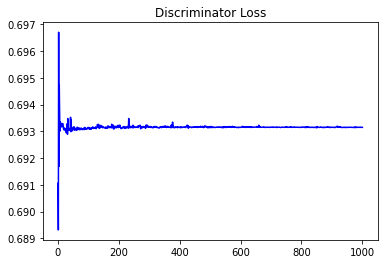

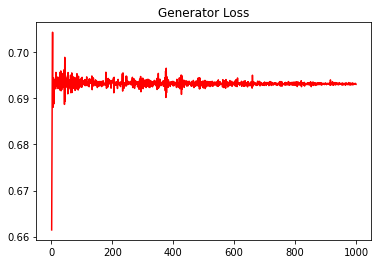

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18427884013102075


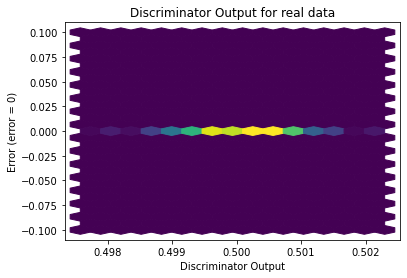

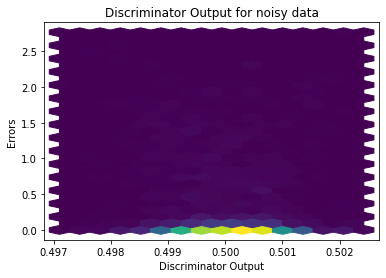

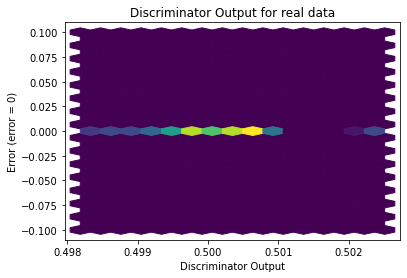

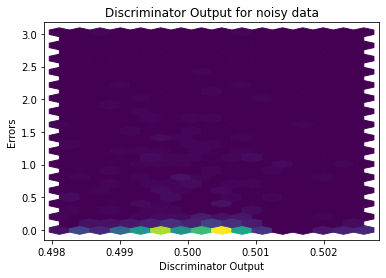

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


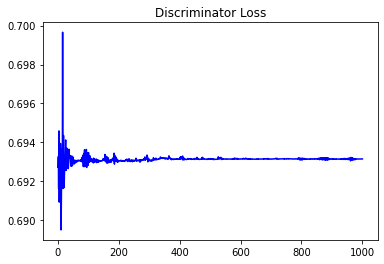

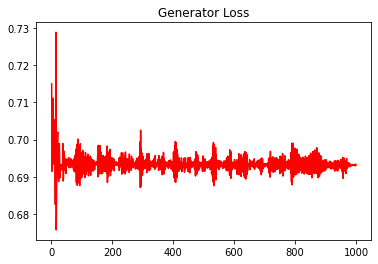

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16901836012662821


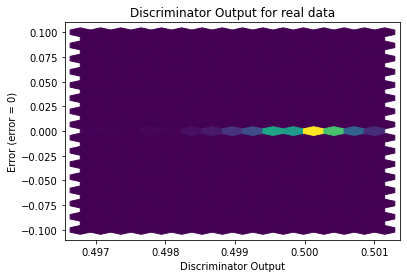

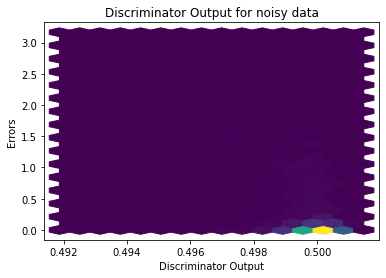

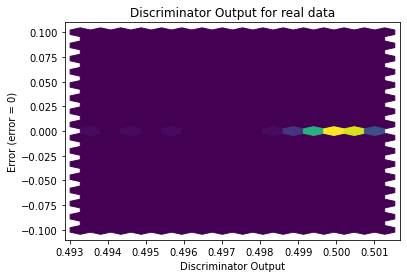

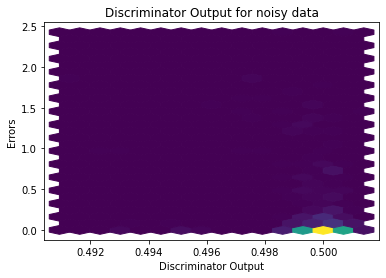

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1054]], requires_grad=True)
